# **Лекция 8: больше графиков и больше численного анализа**

## **План лекции**

- Обсуждение плана лекции и организационных вопросов
- Логарифмическая шкала
- Барплоты (столбчатые диаграммы)
- Гистограммы
- Булевые маски в `numpy`
- Продвинутое индексирование массивов в `numpy`
- `pandas`

Импортируем большинство нужных библиотек:

In [31]:
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

<p>
<details>
<summary> ✨✨ ⬇️ <u> Еще немного про то же самое, но более сложно </u> </summary>

Можно усреднить данные и построить график с ошибкой. Строго говоря, это плохой датасет для этого примера: ошибка не отражает пространственный разброс температуры, а данные только по одному графику. Но как иллюстрация метода такое подойдет! Здесь использовано усреднение [скользящим средним](https://en.wikipedia.org/wiki/Moving_average) (сделанное через свертку, просто поверьте что это то же самое):
```python
data = np.loadtxt('data/temps.txt')

year = data[:, 0]
month = data[:, 1]
temperature = data[:, 2]
uncertainty = data[:, 3]
time = year+month/12

window = 15
temperature_averaged = np.convolve(temperature, np.ones(window), mode='same')/np.ones(window).sum()
uncertainty_averaged = np.convolve(uncertainty, np.ones(window), mode='same')/np.ones(window).sum()

plt.figure(figsize=(16,8))
plt.fill_between(time,
                 y1=temperature_averaged-uncertainty_averaged,
                 y2=temperature_averaged+uncertainty_averaged, alpha=0.1, color='black')

plt.plot(time, temperature, '.', alpha=0.2)
plt.plot(time, temperature_averaged)

plt.ylabel('Температура, $^\circ$C', fontsize=18)     
plt.xlabel('Время, год',fontsize=18)  

plt.legend(['Границы ошибок', 'Данные',
            'Температура (усредненная с окном в 15 месяцев)'],
            fontsize=18)

plt.gca().tick_params(labelsize=18) 
```
Получается следующая картинка:
![](figures/temps_example2.png)    

</details>
</p>

## Логарифмическая шкала

Что если наши данные имеют очень сильный разброс значений? Например, построим оценочную популяцию Земли от года (отрицательные годы представляют годы до н.э., [данные усреднены по нескольким оценкам и разным работам](https://datahub.io/core/population-global-historical)):

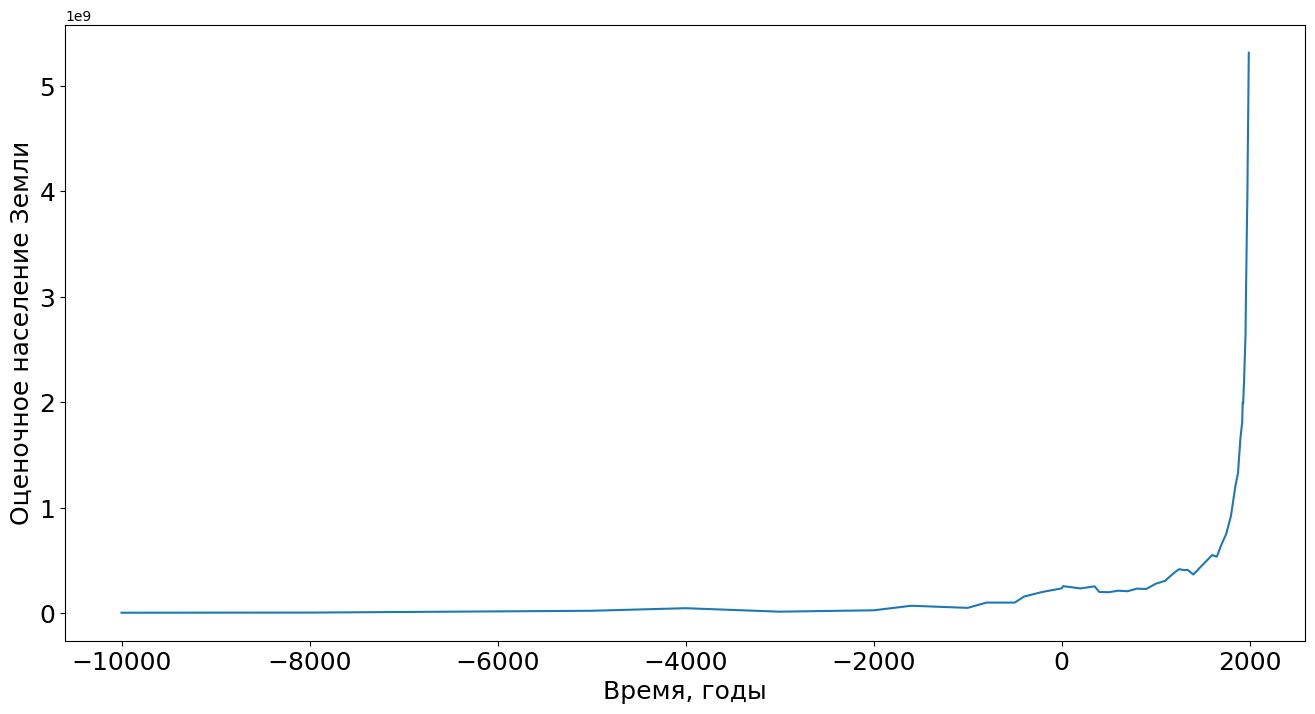

In [3]:
year, population = np.loadtxt('data/population.txt', unpack=True)

population *= 1000*1000 # переводим из тысяч человек

plt.figure(figsize=(16,8))
plt.plot(year, population)
plt.ylabel('Оценочное население Земли', fontsize=18)     
plt.xlabel('Время, годы',fontsize=18)           
plt.gca().tick_params(labelsize=18) 

На этом графике для нас население Земли до 4000 года до н.э. представляет просто прямую линию. Что если мы хотим как-то сохранить информацию об этом на графике? Давайте построим ось `y` в логарифмическом масштабе:

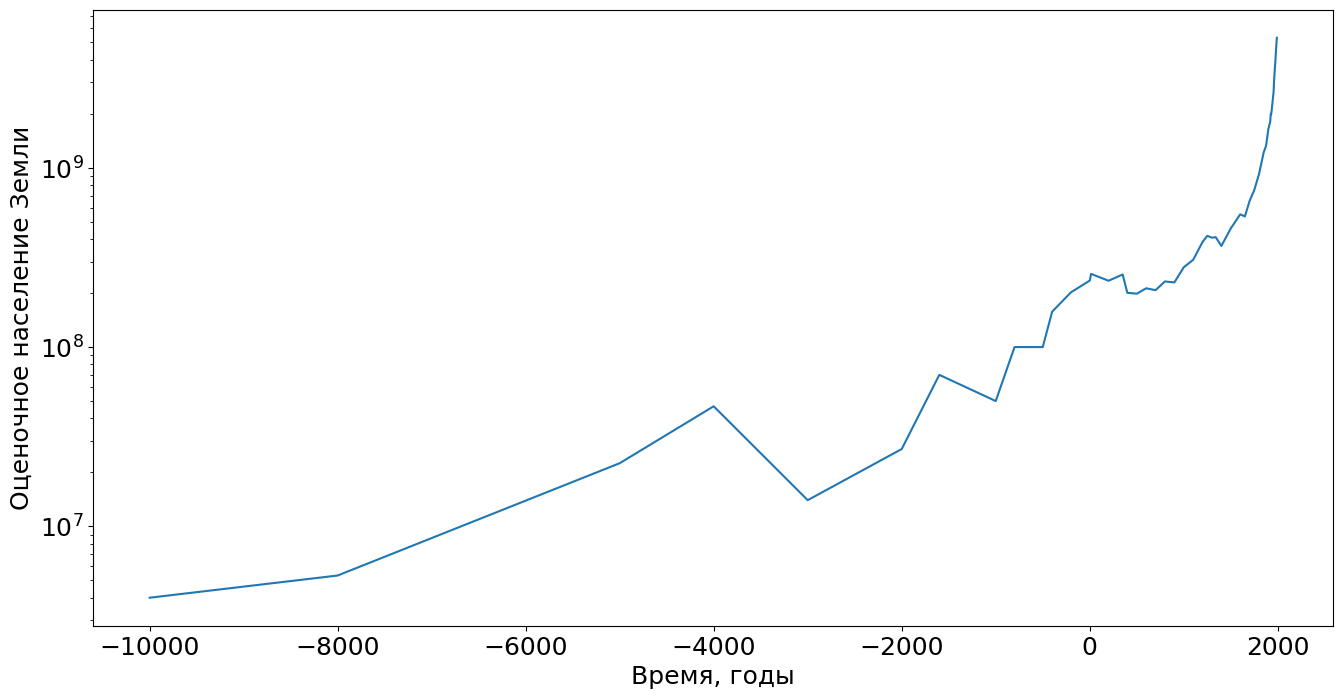

In [4]:
year, population = np.loadtxt('data/population.txt', unpack=True)

population *= 1000*1000 # переводим из тысяч человек

plt.figure(figsize=(16,8))
plt.semilogy(year, population)
plt.ylabel('Оценочное население Земли', fontsize=18)     
plt.xlabel('Время, годы',fontsize=18)           
plt.gca().tick_params(labelsize=18) 

<p>
<details>
<summary> ✨ ⬇️ <u> Мне не нравится такой стиль подписи цифр на осях (10^4 или 10^7). Что можно сделать? </u> </summary>

Есть специальная функция, которая позволяет изменять формат вывода числа которым подписывается засечка в графике (`tick`). Полный список приколов с этим классом функций можно посмотреть здесь, а здесь для нас важно, что мы можем следующей (сложной) конструкцией:
```python
from matplotlib import ticker

year, population = np.loadtxt('data/population.txt', unpack=True)

population *= 1000 # переводим из тысяч человек

plt.figure(figsize=(16,8))
plt.semilogy(year, population)
plt.ylabel('Оценочное население Земли', fontsize=18)     
plt.xlabel('Время, годы', fontsize=18) 
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}")) # вся магия вот здесь
plt.gca().tick_params(labelsize=18) 
```
Здесь важно то, что стоит в выражении `x:.0f` после двоеточия. Это формат вывода цифры, как в [форматированном выводе](https://stackoverflow.com/questions/455612/limiting-floats-to-two-decimal-points)

    
Получается следующая картинка:
![](figures/tick_formatter_example.png)    

</details>
</p>

## Барплоты

Иногда используется следующий стиль визуализации данных: 

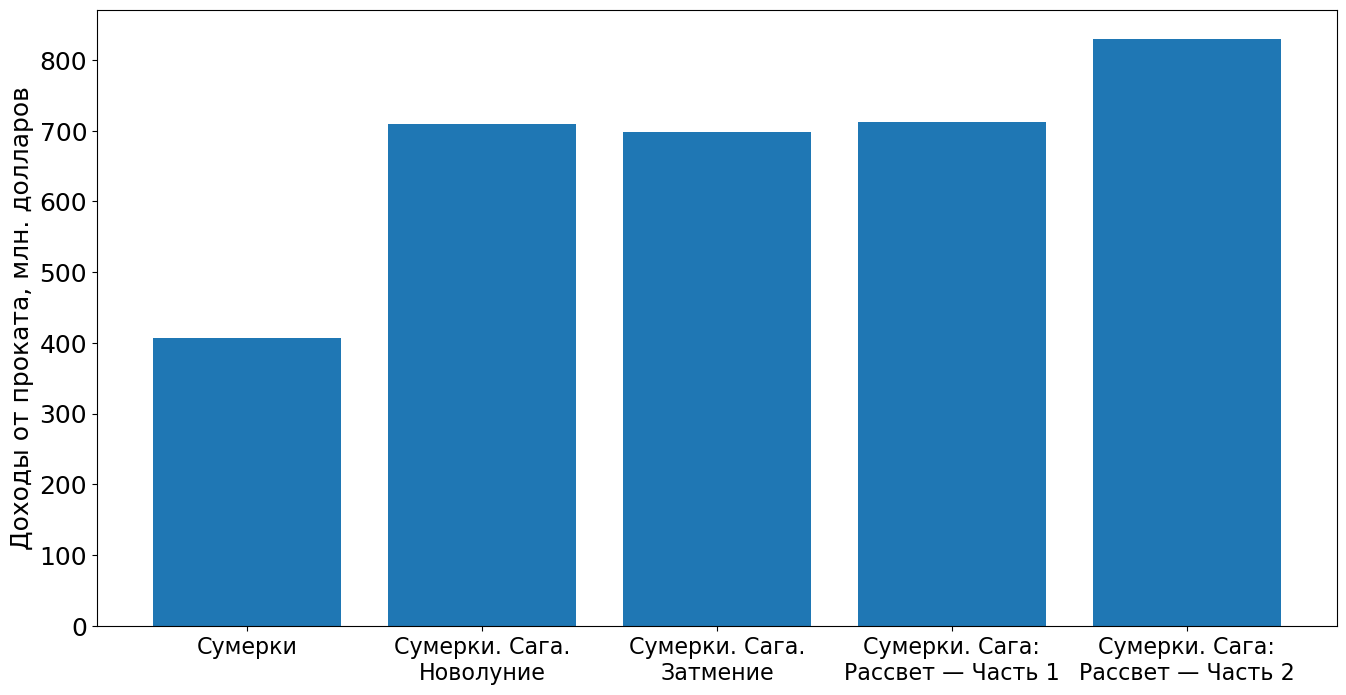

In [5]:
twilight_saga = ['Сумерки', 'Сумерки. Сага.\nНоволуние', 'Сумерки. Сага.\nЗатмение', 
                 'Сумерки. Сага:\nРассвет — Часть 1', 'Сумерки. Сага:\nРассвет — Часть 2']
revenue_box_office = np.array([407187715, 709711008, 698491347, 712205856, 829746820])

plt.figure(figsize=(16,8))
plt.bar(twilight_saga, revenue_box_office/10**6)
plt.ylabel('Доходы от проката, млн. долларов', fontsize=18)    
plt.gca().tick_params(axis='x', labelsize=16) 
plt.gca().tick_params(axis='y', labelsize=18) 


<p>
<details>
<summary> ✨✨ ⬇️ <u> Многослойные барплоты </u> </summary>

Можно создавать вот такое колдунство (код без объясенений):
    
```python
import pandas as pd

moscow_thermal_stress = pd.read_csv('data/thermal_stress_dataset.csv')

plt.figure(figsize=(16,9))
ax = plt.gca()

bottom = np.zeros(40)
all_stresses = ['extreme cold stress', 'strong cold stress',
       'moderate cold stress', 'slight cold stress', 'no thermal stress',
       'slight heat stress', 'moderate heat stress', 'strong heat stress',
       'extreme heat stress']
for counter, stress in enumerate(all_stresses):

    mask_stress = moscow_thermal_stress['Thermal_stress']==stress
    
    # Здесь важно то, что мы задаем то что находится внизу под барплотом (bottom=)
    # То есть как бы стакаем барплоты друг на друга
    ax.bar(moscow_thermal_stress[mask_stress]['Year'], moscow_thermal_stress[mask_stress]['size'], 
        label=stress, bottom=bottom, color=plt.get_cmap("Set3")(counter))
    bottom += moscow_thermal_stress[mask_stress]['size'].values

# Вот так можно вынести легенду за рамки графика:
plt.legend(loc='center right', bbox_to_anchor=(1.3, 0.5), fontsize=16) 
plt.gca().tick_params(labelsize=18) 
plt.title('Москва', fontsize=24)
plt.xlabel('Год', fontsize=20)
plt.ylabel('Количество дней', fontsize=20)

plt.xlim([1978.5, 2018.5])

```
Получается вот такая панелька:
    
![](figures/thermal_stress_moscow.png)

</details>
</p>

## Гистограммы

На самом деле, гистограммы являются частным случаем барплотов! Скажем, у нас есть датасет случайно сгенрированных величин распредленных нормально. Как нам проверить, действительно ли они распредлены нормально?

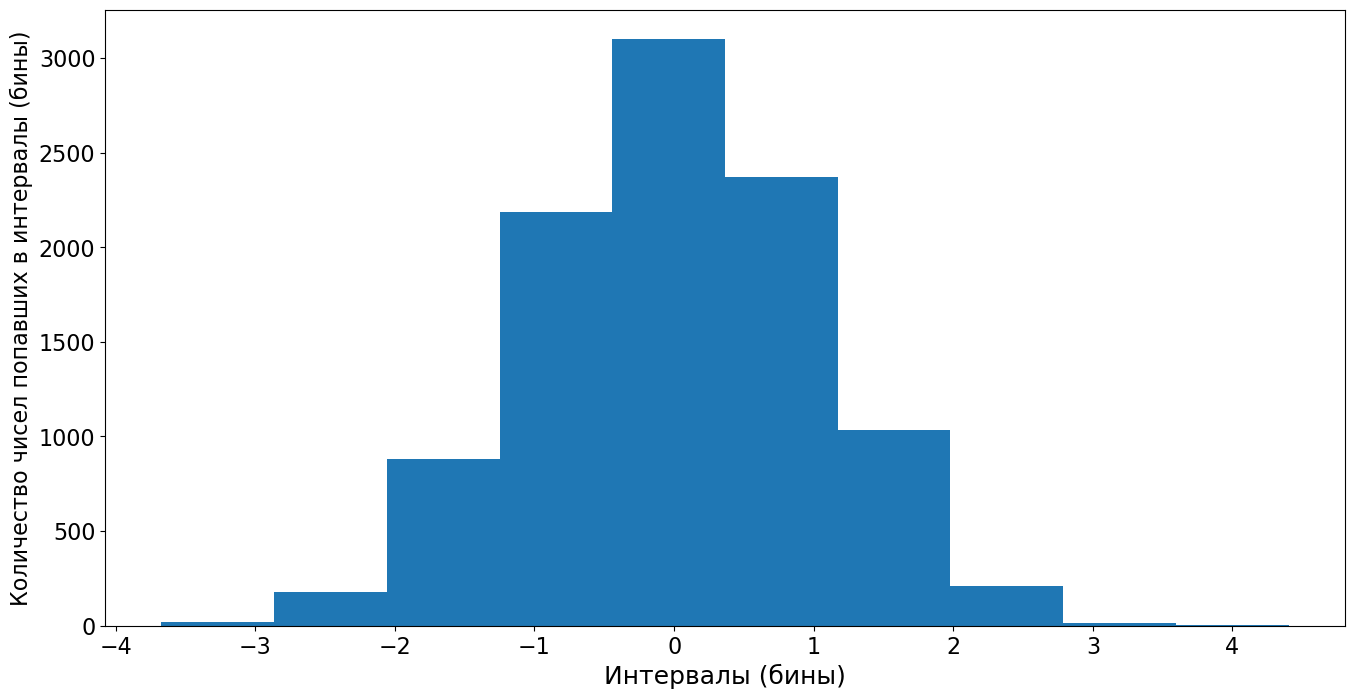

In [6]:
np.random.seed(2024) # зафиксируем числа
normal_dataset = np.random.randn(10000) # 10000 величин распредленных нормальным распредлением
                                      # mu = 0, sigma = 1
plt.figure(figsize=(16,8))
plt.hist(normal_dataset)
plt.xlabel('Интервалы (бины)', fontsize=18)  
plt.ylabel('Количество чисел попавших в интервалы (бины)', fontsize=16)  
plt.gca().tick_params(labelsize=16) 

Что мы сделали? 
- Разделили наш датасет на 10 равных интервалов (бинов) от минимального до максимального числа
- Посчитали количество значений лежащих в этих бинах
- Построили барплот, где по оси `x` отложили получившиеся интервалы, а по оси `y` - значения получившиеся в этих бинах 

Посмотрим, что получится если мы нарисуем то же самое, но с большим количеством бинов:

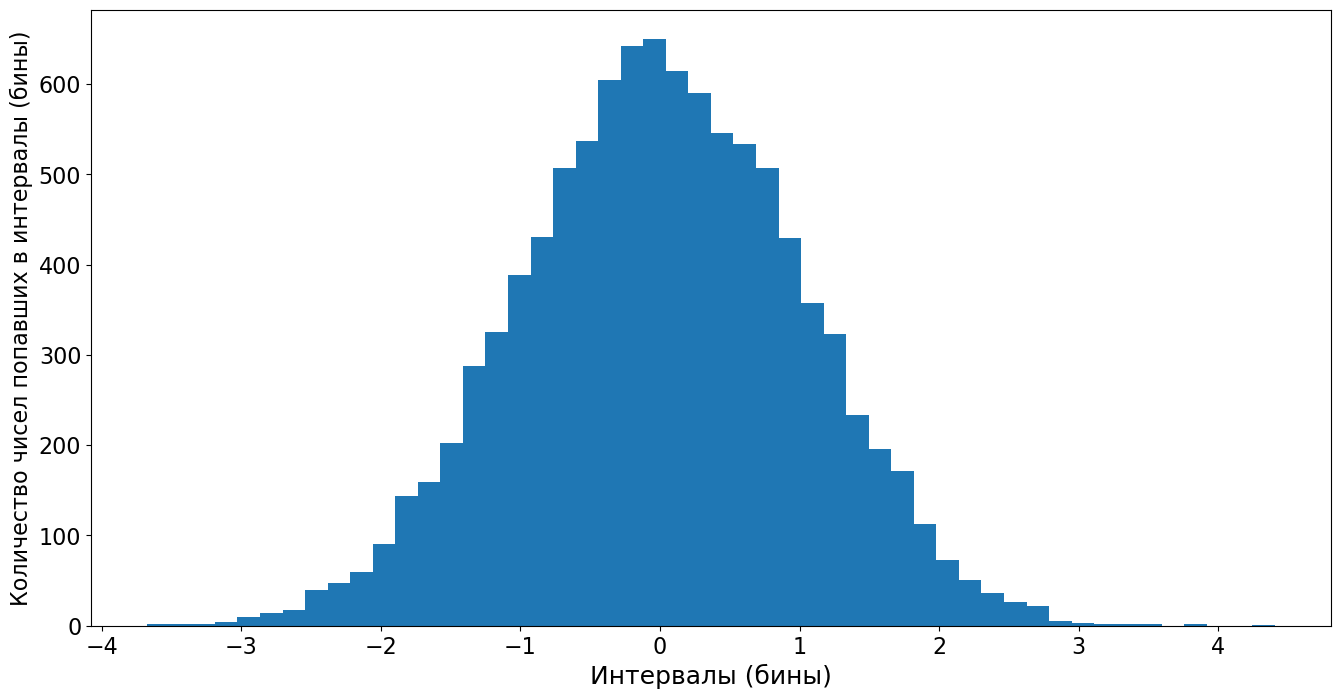

In [7]:
np.random.seed(2024) # используем то же зерно
normal_dataset = np.random.randn(10000) # 10000 величин распредленных нормальным распредлением
                                      # mu = 0, sigma = 1
plt.figure(figsize=(16,8))
plt.hist(normal_dataset, bins=50)
plt.xlabel('Интервалы (бины)', fontsize=18)  
plt.ylabel('Количество чисел попавших в интервалы (бины)', fontsize=16)  
plt.gca().tick_params(labelsize=16) 

Приколы:
- Если написать `n, bins = plt.hist(normal_dataset, bins=50)`, то можно получить значения из этой гистограммы
- С помощью аргумента `range=` можно контроллировать начиная с какого и заканчивая каким значением мы рисуем гистограмму
- Аргумент `density=` позволяет отображать по оси `y` не количество значений в бине, а процент от общего числа

## Булевые маски в `numpy`

Одна из самых полезных фич `numpy` (и других библиотек для работы с численными данными), это индексирование массивов с помощью булевых масок. Что это такое?

Для любого массива мы можем написать поэлементное сравнение, например:

In [8]:
x = np.linspace(1, 10, 10)
mask = x < 5
for element, masked_element in zip(x, mask):
    print(f'Значение элемента: {element} и маски: {masked_element}')

Значение элемента: 1.0 и маски: True
Значение элемента: 2.0 и маски: True
Значение элемента: 3.0 и маски: True
Значение элемента: 4.0 и маски: True
Значение элемента: 5.0 и маски: False
Значение элемента: 6.0 и маски: False
Значение элемента: 7.0 и маски: False
Значение элемента: 8.0 и маски: False
Значение элемента: 9.0 и маски: False
Значение элемента: 10.0 и маски: False


Поставив эту маску в качестве в квадратные скобочки (как мы делаем для индексов), мы можем получить только элементы для которых этот элемент равен `True`:

In [9]:
x = np.linspace(1, 10, 10)
mask = x < 5

print('Массив x:')
print(x)
print('Массив x[x<5]:')
print(x[mask])

Массив x:
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
Массив x[x<5]:
[1. 2. 3. 4.]


Самое главное, что эта маска может применяться не только для самого массива, но и для других тоже. Например:

In [10]:
x = np.linspace(1, 10, 10)
x_squared = x**2

mask = x > 5

print('Массив x_squared:')
print(x_squared)
print('Массив x[x>5]:')
print(x[mask])
print('Массив x_squared[x>5]:')
print(x_squared[mask])

Массив x_squared:
[  1.   4.   9.  16.  25.  36.  49.  64.  81. 100.]
Массив x[x>5]:
[ 6.  7.  8.  9. 10.]
Массив x_squared[x>5]:
[ 36.  49.  64.  81. 100.]


Казалось бы, не очень полезная информация. Более того, казалось бы, мы ведь говорили про графики, как это к нам относится? Посмотрим на следующий пример:

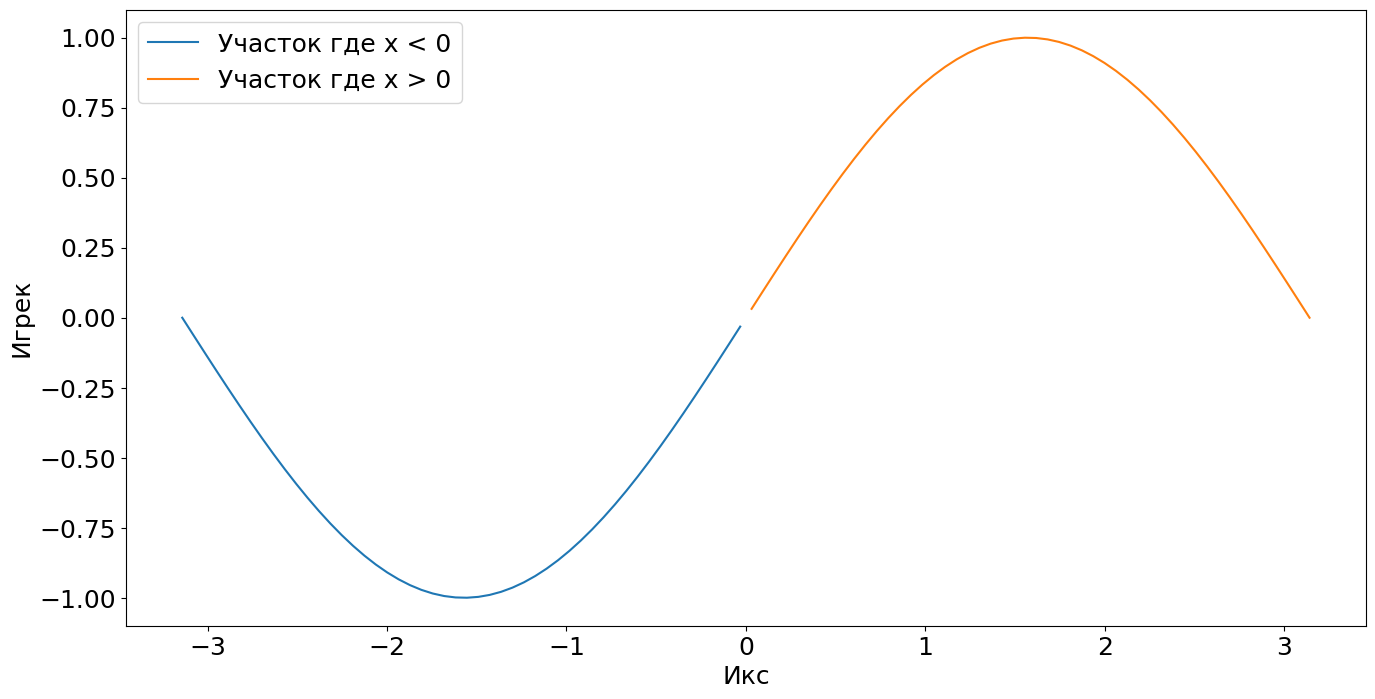

In [11]:
x = np.linspace(-np.pi, np.pi, 100)
y = np.sin(x)

mask_less_0 = x <= 0
mask_more_0 = x >= 0

plt.figure(figsize=(16,8))
plt.plot(x[mask_less_0], y[mask_less_0], label='Участок где x < 0')
plt.plot(x[mask_more_0], y[mask_more_0], label='Участок где x > 0')

plt.ylabel('Игрек', fontsize=18)     
plt.xlabel('Икс',fontsize=18)           
plt.legend(fontsize=18) 
plt.gca().tick_params(labelsize=18) 
plt.show()

<p>
<details>
<summary> ⬇️ <u> Как сделать чтобы не было дырки по середине? </u> </summary>

Дырка происходит потому, что у нас есть крайние точки отрезков, которые как бы и не должны соединяться друг с другом. Две точки, которая одна чуть меньше нуля, другая чуть больше, а между точек нет, а значит и закрашивать нечем. Проще всего строить такие участки просто один поверх другого, так как данные идеально совпадают, нужная нам линия просто закрасит то что снизу:
```python
x = np.linspace(-np.pi, np.pi, 100)
y = np.sin(x)

mask_more_0 = x >= 0

plt.figure(figsize=(16,8))
plt.plot(x, y, label='Участок где x < 0')
plt.plot(x[mask_more_0], y[mask_more_0], label='Участок где x > 0')

plt.ylabel('Игрек', fontsize=18)     
plt.xlabel('Икс',fontsize=18)           
plt.legend(fontsize=18) 
plt.gca().tick_params(labelsize=18) 
```

</details>
</p>

Посмотрим на более релевантный пример:

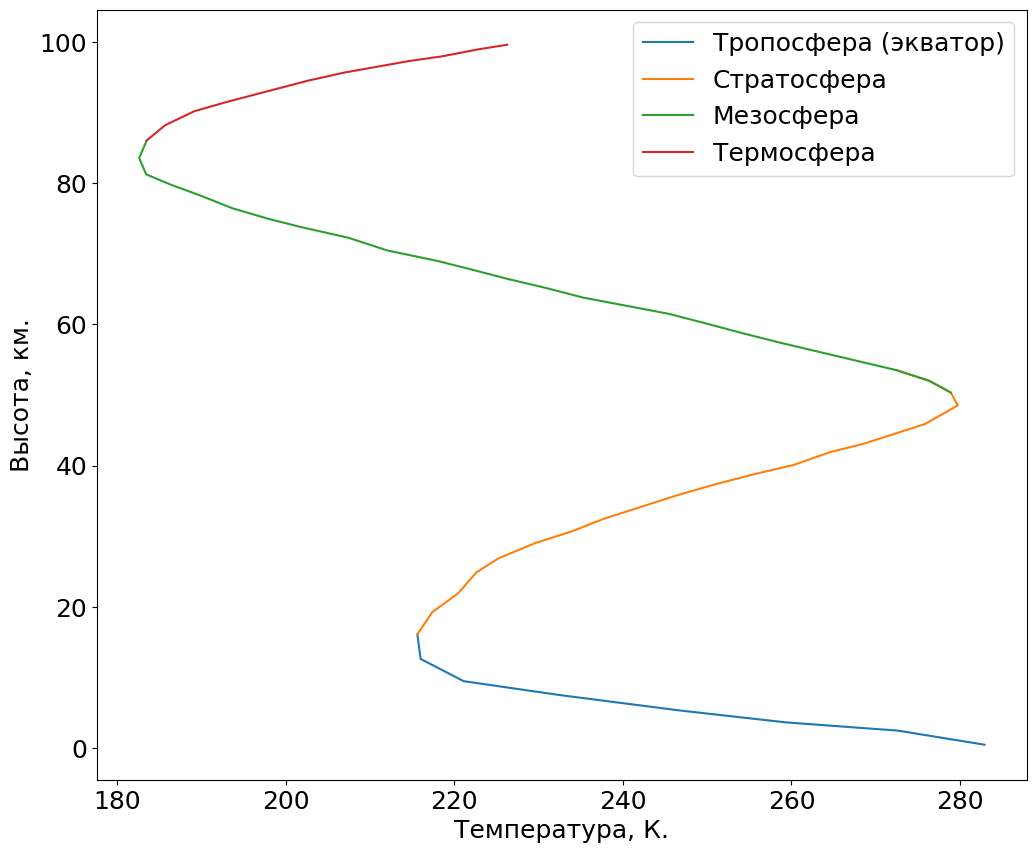

In [12]:
temperature, altitude = np.loadtxt('data/temp_profile.csv', unpack=True, delimiter=',')

mask_troposphere = altitude < 18 # созднательно выделил верхние границы повыше чтобы не было дырок
mask_stratosphere = (altitude > 15) & (altitude < 54)
mask_mesosphere = (altitude > 50) & (altitude < 87)
mask_thermosphere = (altitude > 85)

plt.figure(figsize=(12,10))
plt.plot(temperature[mask_troposphere], altitude[mask_troposphere], label='Тропосфера (экватор)')
plt.plot(temperature[mask_stratosphere], altitude[mask_stratosphere], label='Стратосфера')
plt.plot(temperature[mask_mesosphere], altitude[mask_mesosphere], label='Мезосфера')
plt.plot(temperature[mask_thermosphere], altitude[mask_thermosphere], label='Термосфера')

plt.ylabel('Высота, км.', fontsize=18)     
plt.xlabel('Температура, К.',fontsize=18)           
plt.legend(fontsize=18) 
plt.gca().tick_params(labelsize=18) 

Очевидно, что мы можем делать селекцию данных по любому критерию, главное чтобы у нас по итогу получалась маска с `True` и `False` (`boolean mask`). Например, у нас есть сет данных `Sentinel` высокого разрешения но с узкоугольным покрытием. У нас есть координаты центров этих изображений:

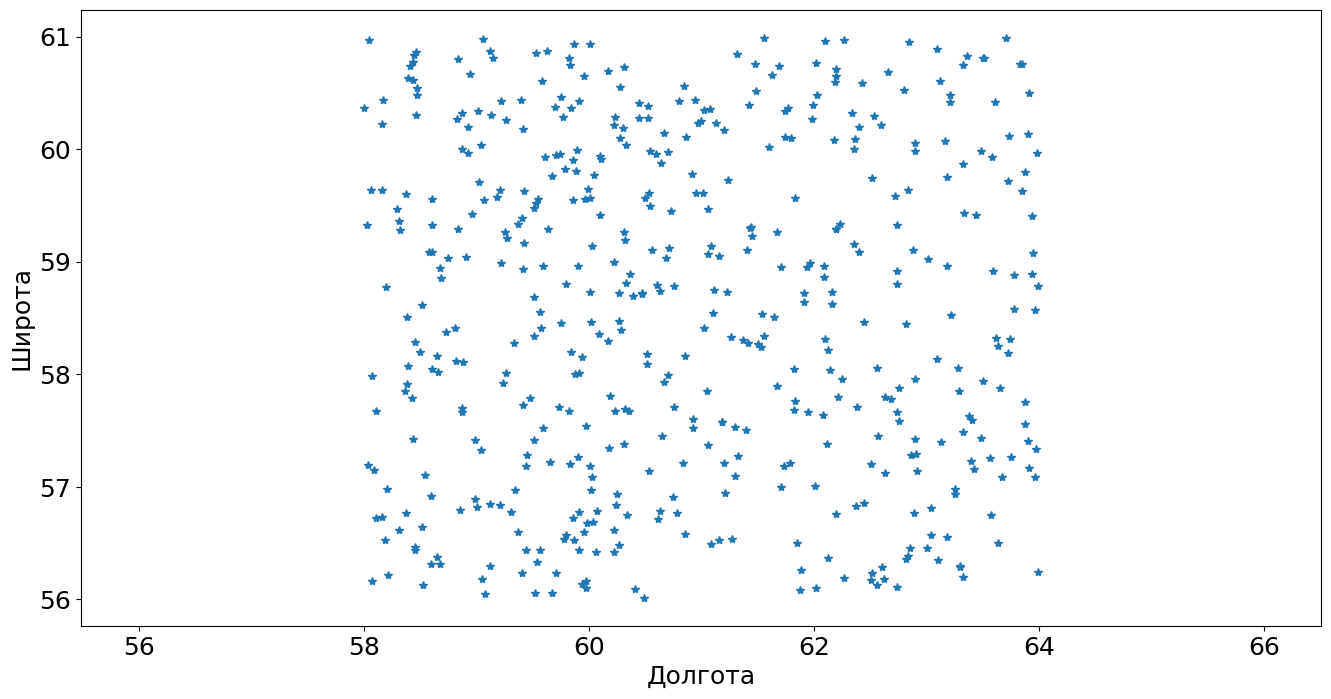

In [13]:
np.random.seed(5678912) 

lat = np.random.rand(500)*5 + 56 # координаты по широте от 56 до 61
lon = np.random.rand(500)*6 + 58 # координаты по долгорте от 58 до 64

plt.figure(figsize=(16,8))
plt.plot(lon, lat, '*')

plt.axis('equal')

plt.ylabel('Широта', fontsize=18)     
plt.xlabel('Долгота',fontsize=18)           
plt.gca().tick_params(labelsize=18) 

Допустим, нам нужно найти только наблюдения радиусом в один градус вокруг `(60.6, 58.8)`:

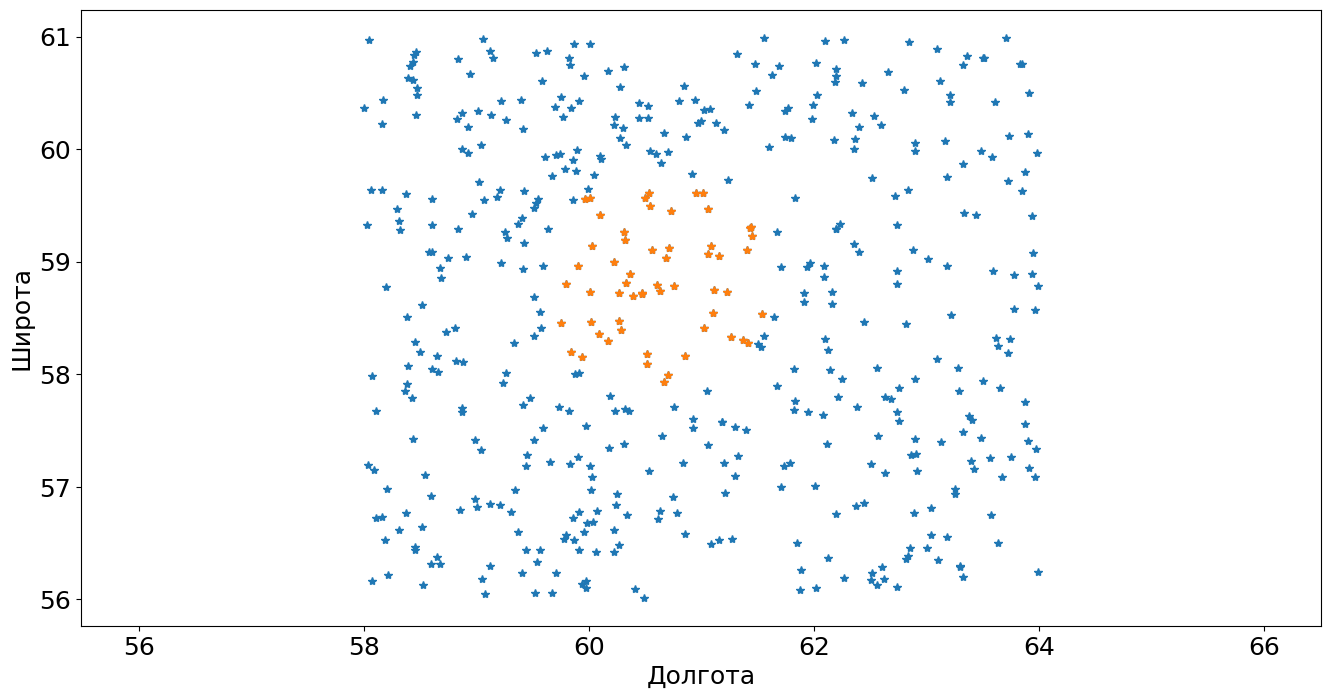

In [14]:
mask = np.sqrt((lat - 58.8)**2 + (lon - 60.6)**2) < 1

plt.figure(figsize=(16,8))
plt.plot(lon, lat, '*')
plt.plot(lon[mask], lat[mask], '*', c='C1')

plt.axis('equal')

plt.ylabel('Широта', fontsize=18)     
plt.xlabel('Долгота',fontsize=18)           
plt.gca().tick_params(labelsize=18) 

### Что если нам нужны два условия одновременно? 

Просто нужно найти поэлементное `И` для двух масок. Это делается с помощью оператора `&`.  Давайте выделим, например, долготу от `60` до `62`:

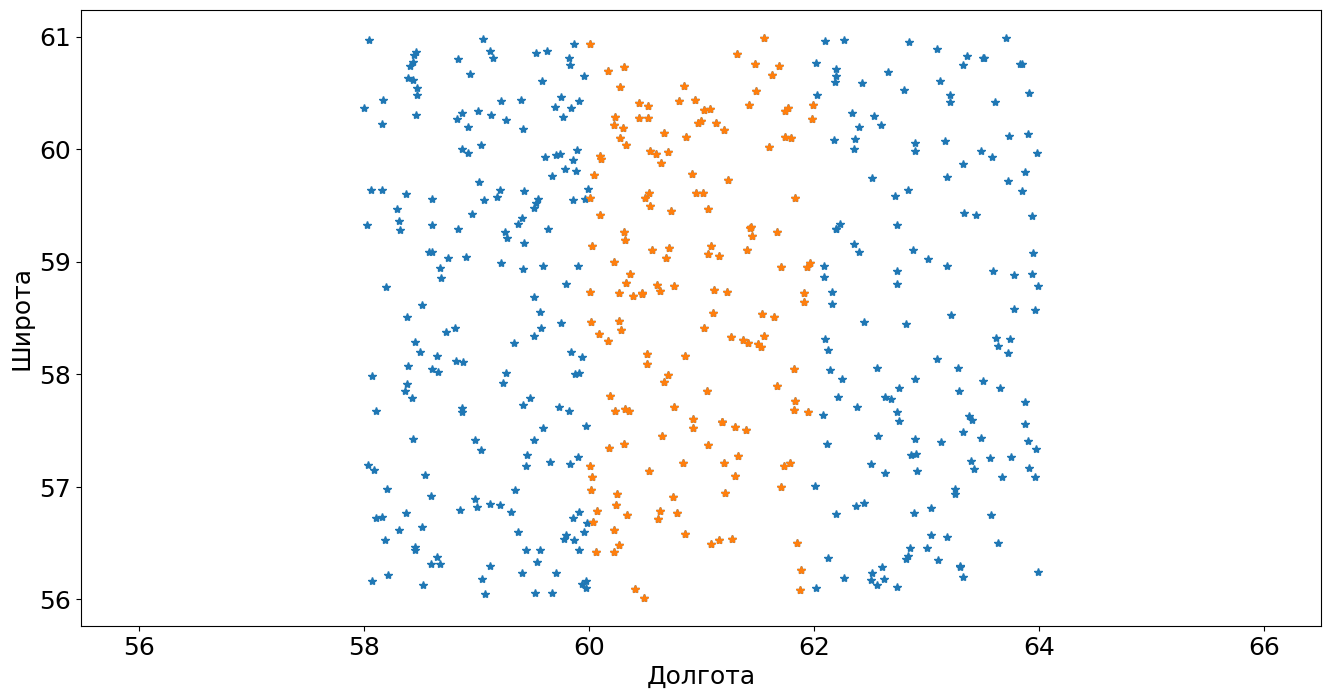

In [15]:
np.random.seed(5678912) 

lat = np.random.rand(500)*5 + 56 # координаты по широте от 56 до 61
lon = np.random.rand(500)*6 + 58 # координаты по долгорте от 58 до 64

mask_lon = (lon > 60) & (lon < 62)


plt.figure(figsize=(16,8))
plt.plot(lon, lat, '*')
plt.plot(lon[mask_lon], lat[mask_lon], '*', c='C1')

plt.axis('equal')

plt.ylabel('Широта', fontsize=18)     
plt.xlabel('Долгота',fontsize=18)           
plt.gca().tick_params(labelsize=18) 

Если вы хотите применить две маски, их надо применять не последовательно, а находить поэлеметное `&`. Возьмем маски из двух последних примеров и применим их последовательно:

IndexError: boolean index did not match indexed array along dimension 0; dimension is 57 but corresponding boolean dimension is 500

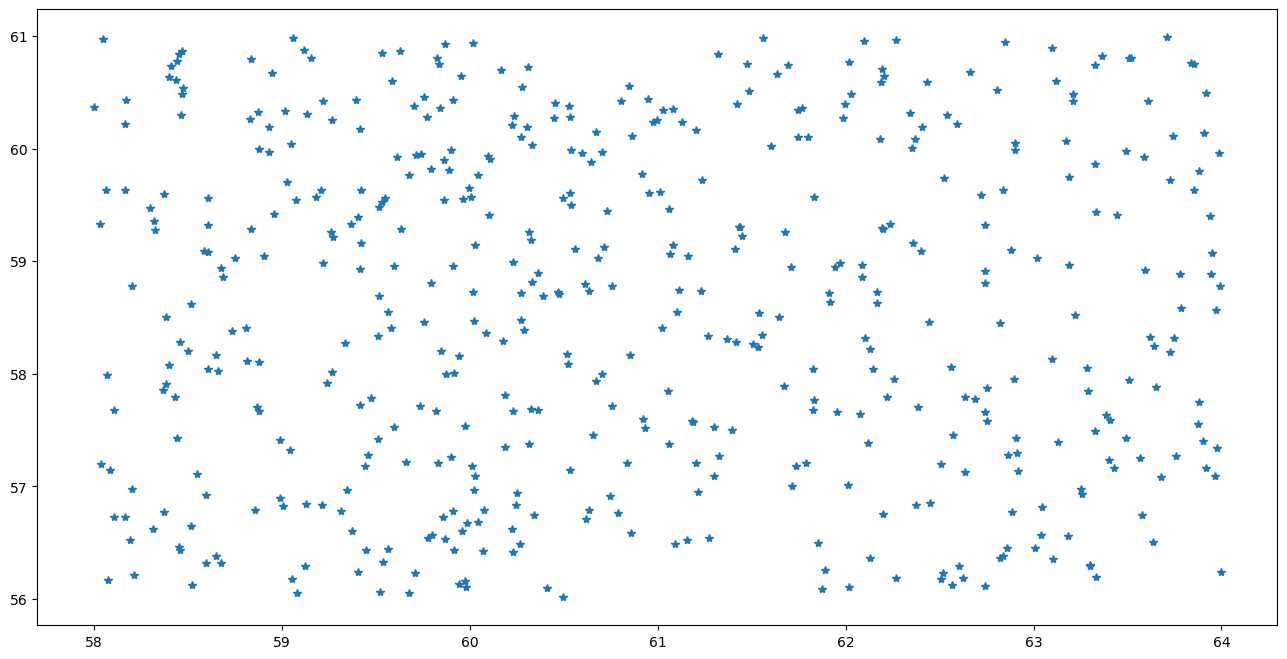

In [26]:
np.random.seed(5678912) 

lat = np.random.rand(500)*5 + 56 # координаты по широте от 56 до 61
lon = np.random.rand(500)*6 + 58 # координаты по долгорте от 58 до 64

mask_lon = (lon > 60) & (lon < 62)
mask = np.sqrt((lat - 58.8)**2 + (lon - 60.6)**2) < 1

plt.figure(figsize=(16,8))
plt.plot(lon, lat, '*')
plt.plot(lon[mask][mask_lon], lat[mask][mask_lon], '*', c='C1')

plt.axis('equal')

plt.ylabel('Широта', fontsize=18)     
plt.xlabel('Долгота',fontsize=18)           
plt.gca().tick_params(labelsize=18) 

## Продвинутое индексирование

Раз уж мы заговорили про индексирование масками, то обсудим и другие приколы, связанные с этим. Помните, мы сортивали один массив по другому? Есть хитрый способ это сделать в `numpy`. Возьмем данные в следующем виде:

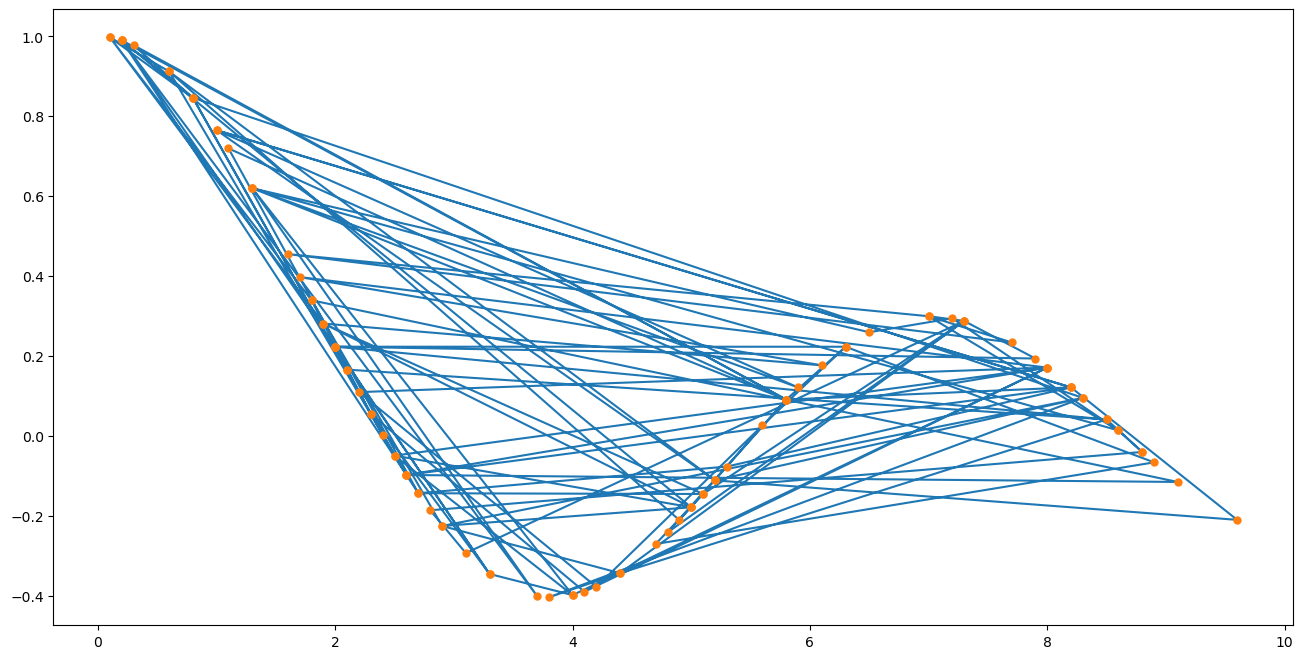

In [27]:
x, y = np.loadtxt('data/wtf.txt', unpack=True)

plt.figure(figsize=(16,8))
plt.plot(x, y, '-')
plt.plot(x, y, '.', markersize=10)
plt.show()

Наша проблема в том, что данные не упорядчены по возрастанию `x`. Для этого существует интересная функция:

In [28]:
sorted_indexes = np.argsort(x)
sorted_indexes

array([33, 79, 44,  8, 55, 74, 78, 60, 80, 73, 43, 12, 16, 20, 46, 18,  4,
       50, 30, 34, 39, 32, 93, 68, 86,  7, 64, 65, 38, 28, 69, 66, 42, 96,
       72, 41, 77, 99,  9, 21, 89, 35, 57, 90,  6, 67, 45, 82, 97,  5, 70,
       27, 83, 36, 23, 53, 61, 56, 94, 95, 92, 22, 59, 13, 10, 26, 75, 54,
       62, 19, 17, 31, 25, 63,  3, 48, 51,  2, 91, 84, 52, 49, 85, 71, 98,
       29, 76, 11, 15, 58, 81, 87, 37,  1, 47,  0, 88, 24, 40, 14])

Что произошло? Мы получили порядок, в котором нужно расставить элементы массива `x`, так чтобы значения росли по возрастанию. То есть первым нужно поставить элемент с индексом `33`, потом с индексом `79`, потом с индексом `44`и так далее. 


Если мы попробуем засунуть эти отсортированные индексы в квадратные скобки, то мы получим именно это: элементы массива `x` будут рассортированы согласно этому порядку: первым будет `33`-ий элемент, вторым `79`-ый и так далее. Посмотрим:

In [29]:
x[sorted_indexes]

array([0.1, 0.1, 0.2, 0.2, 0.2, 0.3, 0.6, 0.6, 0.8, 0.8, 0.8, 1. , 1. ,
       1.1, 1.3, 1.3, 1.3, 1.6, 1.7, 1.8, 1.8, 1.9, 1.9, 2. , 2. , 2. ,
       2. , 2.1, 2.1, 2.2, 2.3, 2.3, 2.4, 2.5, 2.5, 2.6, 2.6, 2.6, 2.7,
       2.7, 2.8, 2.9, 2.9, 3.1, 3.3, 3.3, 3.7, 3.8, 4. , 4. , 4.1, 4.2,
       4.4, 4.4, 4.7, 4.8, 4.9, 5. , 5. , 5. , 5.1, 5.1, 5.2, 5.2, 5.3,
       5.6, 5.8, 5.8, 5.8, 5.8, 5.9, 6.1, 6.3, 6.3, 6.5, 7. , 7. , 7.2,
       7.3, 7.3, 7.3, 7.7, 7.9, 8. , 8. , 8. , 8.2, 8.2, 8.2, 8.3, 8.3,
       8.5, 8.5, 8.6, 8.6, 8.8, 8.8, 8.9, 9.1, 9.6])

Так как `x` связаны, то это отсортирует и `x` и `y`:

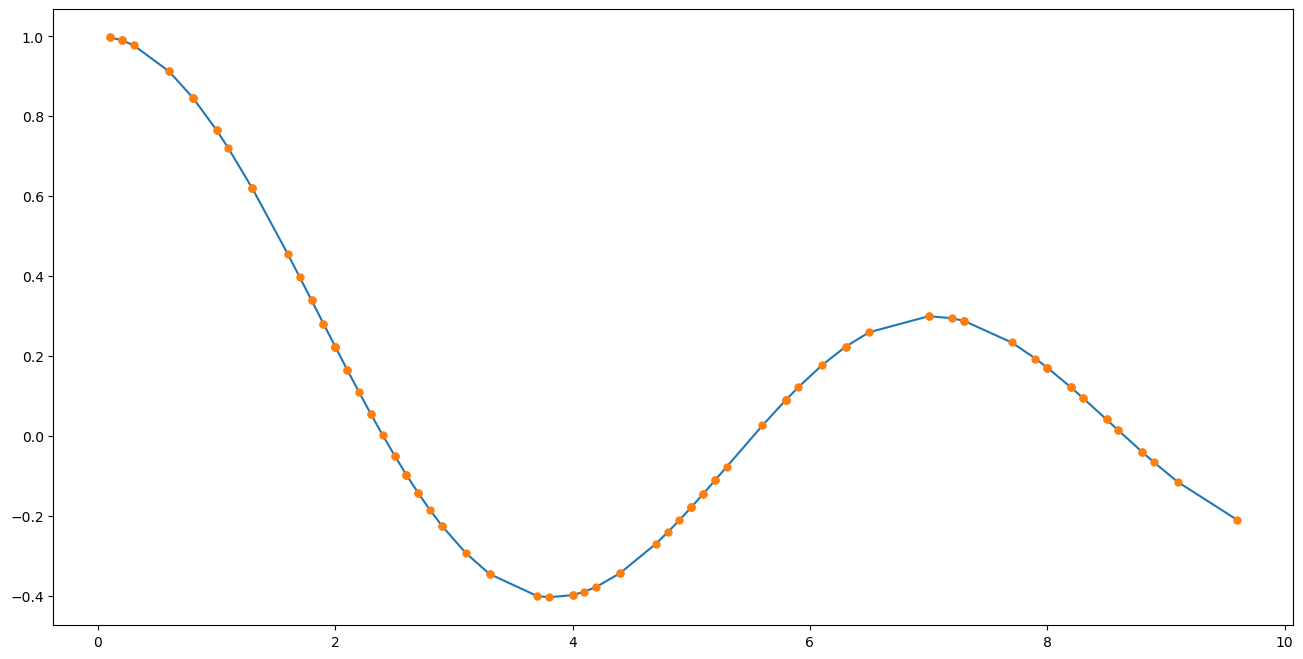

In [32]:
x, y = np.loadtxt('data/wtf.txt', unpack=True)

plt.figure(figsize=(16,8))
plt.plot(x[sorted_indexes], y[sorted_indexes], '-')
plt.plot(x[sorted_indexes], y[sorted_indexes], '.', markersize=10)
plt.show()

# `pandas`

`pandas` это очень удобная библиотека для загрузки, обработки и индексирование табличных данных. Любые данные, которые записаны в виде таблиц (`csv`, `xls`, etc.) можно загрузить с помощью `pandas` и работать с ними!

> ☝️ **Когда использовать `pandas`**?
> 
> Я не советую использовать `pandas` для работы со ВСЕМИ данными. Используйте его в тех случаях, когда в вашей таблице есть строчные данные или данные с датой/временем! В случаях работы с массивами данных я настоятельно рекоммендую использовать `np.loadtxt`: это гораздо более быстро и существенно более оптимизировано.

### Считывание

Для того чтобы загрузить данные, нам понадобится функция `pd.read_csv()`. Синтаксис и полезные аргументы:
- `pd.read_csv('filename.csv')`: считываем файл `filename.csv`.
- Аргумент `delimiter=`: позволяет считывать данные, разделенные разными символами. Стандратный разделить - запятая.
- Аргумент `skiprows=`: позволяет пропускать линии в начале файла
- Аргумент `usecols=`: позволяет считывать только определенные столбцы и принимает на вход список названий столбцов, которые надо считывать. Например `usecols=['City', 'State', 'Model Year']`
- Аргумент `encoding=`: задает кодировку. Если что-то слетает, советую попробовать `encoding='utf8'`

Тип данных назвается `pandas.dataframe` или просто *датафрейм*. Иногда в качесте стандартного названия переменной используют `df`, поэтому так иногда тоже могут назвать! Давайте загрузим какой-нибудь датасет и посмотрим как работать с данными:

In [142]:
electric_vehicles = pd.read_csv('data/Electric_Vehicle_Population_Data.csv')
electric_vehicles

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,Vehicle Location Lat,Vehicle Location Lon
0,5UXKT0C59G,Yakima,Zillah,WA,98953.0,2016,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,15.0,206822717,PACIFICORP,5.307700e+10,46.405560,-120.263100
1,5YJ3E1EA2J,Snohomish,Edmonds,WA,98020.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,21.0,137721636,PUGET SOUND ENERGY INC,5.306105e+10,47.808070,-122.375000
2,1G1RE6E4XE,Kitsap,Port Orchard,WA,98367.0,2014,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,26.0,197718468,PUGET SOUND ENERGY INC,5.303509e+10,47.505240,-122.684707
3,2C4RC1L76M,Skagit,Bow,WA,98232.0,2021,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32,0,40.0,256274308,PUGET SOUND ENERGY INC,5.305795e+10,48.561388,-122.440630
4,5YJ3E1EA2J,Thurston,Olympia,WA,98513.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,2.0,259176578,PUGET SOUND ENERGY INC,5.306701e+10,46.988760,-122.817540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,1FTVW1EL7P,King,Redmond,WA,98052.0,2023,FORD,F-150,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,45.0,258071341,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10,47.676680,-122.123000
195,WVGUNPE22M,King,Redmond,WA,98052.0,2021,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,48.0,187507470,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10,47.676680,-122.123000
196,JN1AZ0CP5B,King,Redmond,WA,98052.0,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,48.0,221511090,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10,47.676680,-122.123000
197,WA1LAAGE0K,Pierce,Lakewood,WA,98498.0,2019,AUDI,E-TRON,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,204,0,28.0,254808872,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10,47.176685,-122.547640


Как вы уже заметили, в `jupyter` переменную можно выводить, просто написав ее в последней строчке ячейки, без `print`-а. В случае пандас, это создает очень удобную табличку с превью её начала и конца!

Другую полезную информацию можно узнать с помощью метода `.info()`:

In [143]:
electric_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN (1-10)                                         199 non-null    object 
 1   County                                             199 non-null    object 
 2   City                                               199 non-null    object 
 3   State                                              199 non-null    object 
 4   Postal Code                                        199 non-null    float64
 5   Model Year                                         199 non-null    int64  
 6   Make                                               199 non-null    object 
 7   Model                                              199 non-null    object 
 8   Electric Vehicle Type                              199 non-null    object 
 9   Clean Alte

Превью начала и конца можно получить с помощью методов `.head(количество_строк)` и `.tail(количество_строк)`:

In [144]:
electric_vehicles.head(10)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,Vehicle Location Lat,Vehicle Location Lon
0,5UXKT0C59G,Yakima,Zillah,WA,98953.0,2016,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,15.0,206822717,PACIFICORP,5.307700e+10,46.405560,-120.263100
1,5YJ3E1EA2J,Snohomish,Edmonds,WA,98020.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,21.0,137721636,PUGET SOUND ENERGY INC,5.306105e+10,47.808070,-122.375000
2,1G1RE6E4XE,Kitsap,Port Orchard,WA,98367.0,2014,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,26.0,197718468,PUGET SOUND ENERGY INC,5.303509e+10,47.505240,-122.684707
3,2C4RC1L76M,Skagit,Bow,WA,98232.0,2021,CHRYSLER,PACIFICA,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,32,0,40.0,256274308,PUGET SOUND ENERGY INC,5.305795e+10,48.561388,-122.440630
4,5YJ3E1EA2J,Thurston,Olympia,WA,98513.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,2.0,259176578,PUGET SOUND ENERGY INC,5.306701e+10,46.988760,-122.817540
5,WA1E2BFY8N,Snohomish,Snohomish,WA,98296.0,2022,AUDI,Q5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,23,0,1.0,207797957,PUGET SOUND ENERGY INC,5.306105e+10,47.885116,-122.151300
6,KNDCE3LG2K,Thurston,Olympia,WA,98506.0,2019,KIA,NIRO,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,239,0,22.0,256221178,PUGET SOUND ENERGY INC,5.306701e+10,47.051957,-122.887478
7,5YJ3E1EB9K,Snohomish,Edmonds,WA,98020.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,32.0,477226991,PUGET SOUND ENERGY INC,5.306105e+10,47.808070,-122.375000
8,WBY8P2C57K,King,Seattle,WA,98102.0,2019,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,153,0,43.0,121649510,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,47.640580,-122.322200
9,1FADP5CU2D,Thurston,Lacey,WA,98503.0,2013,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,22.0,115266077,PUGET SOUND ENERGY INC,5.306701e+10,47.036460,-122.828000


### Колонки и `pd.Series`

Обращение с колонками в `pandas` в целом очень похоже на работу со словарем. Но это в целом довольно логично: по структуре это очень похоже на словарь, есть разные *ключи* (*названия столбцов*) и по ним есть *значения* (*значения столбцов*), только значений должно быть одинаковое количество по всем ключам. Названия колонок можно получить через параметр `.columns` (обращение к ниму без скобочек):

In [145]:
electric_vehicles.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Electric Utility', '2020 Census Tract', 'Vehicle Location Lat',
       'Vehicle Location Lon'],
      dtype='object')

Обращаться к конкретному столбцу нужно через название столбца в квадратных скобках:

In [146]:
electric_vehicles['Model']

0            X5
1       MODEL 3
2          VOLT
3      PACIFICA
4       MODEL 3
         ...   
194       F-150
195        ID.4
196        LEAF
197      E-TRON
198        ID.4
Name: Model, Length: 199, dtype: object

Это отдельный класс, который называется `Series`. Грубо говоря, с ним работает почти все, что и с `np.array`, но есть много мелких различий. Во многих случаях я советую его конвертировать в `np.array`:

In [147]:
electric_vehicles['Electric Range'].values

array([ 14, 215,  38,  32, 215,  23, 239, 220, 153,  19, 215, 107,  33,
       291, 107, 215, 249,  73,  72, 238, 291,   0,  21, 208,   0, 220,
        84,  26, 259, 150,  75, 215,  32,   0, 210,  84,  21,  25,  82,
       239, 151, 238,   0, 208, 270,  73, 204, 291, 210,  30, 208, 293,
       215,   0, 125,  75, 220, 215,  35, 210, 208,  14,  84,   0,  84,
       153,   0, 210,  25,  87, 220, 215, 210, 151, 239, 200, 107,  84,
       238,   0,  22,  25, 215,  21, 308, 151, 266, 234,  47,  33,  73,
         0,  83,  19,  47, 204,  81, 220, 266, 291, 150,  87,  84, 215,
        84, 210,  97,  23,  81,  13,  84,   0, 215,   0,  23,  72, 238,
       149,  53,  72,  37,   0, 266,  19, 208, 208,  72, 151, 266,  26,
         0,   0, 215,  84,  84, 220, 270, 293, 220,   0,   0, 215, 215,
        75,  38,  38,   0,   0, 208, 259,   0,   0, 322,  38,   0,   0,
        25,  25, 220,   0,   0,   0,  84,  23,  73,   0,   0,   0,   0,
         0,  84, 322,   0, 151,   0,  35,   0,  84, 259,   0,  3

У `Series` есть свои удобные методы. Перечислим самые полезные (все можно посмотреть [здесь](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html)):
- Почти все методы `numpy`:

In [148]:
(electric_vehicles['Electric Range'].max(),
 electric_vehicles['Electric Range'].mean(),
 electric_vehicles['Electric Range'].min(),
 electric_vehicles['Electric Range'].argmax()) # индекс самого большого элемента

(322, 108.62814070351759, 0, 152)

- `.describe()`: позволяет получить короткое описание

In [149]:
electric_vehicles['Electric Range'].describe()

count    199.000000
mean     108.628141
std      100.428589
min        0.000000
25%       16.500000
50%       82.000000
75%      212.500000
max      322.000000
Name: Electric Range, dtype: float64

- `.unique()`: позволяет получить уникальные элементы 

In [154]:
electric_vehicles['Model'].unique()

array(['X5', 'MODEL 3', 'VOLT', 'PACIFICA', 'Q5', 'NIRO', 'I3', 'C-MAX',
       'LEAF', 'TUCSON', 'MODEL Y', 'MODEL S', 'BOLT EV', 'WRANGLER',
       'PRIUS PRIME', 'SPARK', 'R1T', 'E-TRON', 'MODEL X',
       'MUSTANG MACH-E', 'E-GOLF', '500', 'OUTLANDER', 'I-PACE',
       'CLARITY', 'R1S', 'B-CLASS', 'XC40', 'Q5 E', 'NX', 'FUSION',
       'IONIQ 5', 'AIR', 'GRAND CHEROKEE', 'BOLT EUV', 'SOLTERRA', 'ID.4',
       'XC90', 'EQE-CLASS SUV', 'EV6', 'GLC-CLASS', 'F-150'], dtype=object)

### Индексирование

У всех `pandas` датафреймов есть отдельный параметер (даже почти колонка) `index`, в превью она самая левая и обычно не подписывается. Ее можно получить с помощью `electric_vehicles.index` или `electric_vehicles.index`:

In [155]:
electric_vehicles.index, electric_vehicles.index.values

(RangeIndex(start=0, stop=199, step=1),
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169

`index` создается при импорте и служит чем-то вроде номера элементов, но при этом он статичен и не меняется при изменениях таблицы внутри питона.

Другая крайне важная и удобная фишка `pandas` заключается в удобной и минималистичной системе масок. По сути, она максимально похожа на маски в `numpy` и почти идентична по синтаксису:

In [156]:
electric_vehicles[electric_vehicles['Make']=='BMW']

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,Vehicle Location Lat,Vehicle Location Lon
0,5UXKT0C59G,Yakima,Zillah,WA,98953.0,2016,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,15.0,206822717,PACIFICORP,5.307700e+10,46.405560,-120.263100
8,WBY8P2C57K,King,Seattle,WA,98102.0,2019,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,153,0,43.0,121649510,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,47.640580,-122.322200
18,WBY1Z4C56E,Kitsap,Bremerton,WA,98312.0,2014,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,72,0,35.0,221479254,PUGET SOUND ENERGY INC,5.303508e+10,47.571920,-122.652200
49,5UXTA6C08N,Snohomish,Bothell,WA,98012.0,2022,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,1.0,200756153,PUGET SOUND ENERGY INC,5.306105e+10,47.820245,-122.187000
61,5UXKT0C34H,Douglas,East Wenatchee,WA,98802.0,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,12.0,138837380,PUD NO 1 OF DOUGLAS COUNTY,5.301795e+10,47.417600,-120.286700
65,WBY8P6C51K,Stevens,Loon Lake,WA,99148.0,2019,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,153,0,7.0,478044206,NO KNOWN ELECTRIC UTILITY SERVICE,5.306595e+10,48.059540,-117.634500
96,WBY1Z2C52E,King,Seattle,WA,98119.0,2014,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81,0,36.0,246985581,CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,47.630460,-122.363810
106,WBY1Z8C38H,Snohomish,Bothell,WA,98012.0,2017,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,97,0,21.0,112550595,PUGET SOUND ENERGY INC,5.306105e+10,47.820245,-122.187000
108,WBY1Z2C50E,Yakima,Yakima,WA,98901.0,2014,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81,0,15.0,101485023,PACIFICORP,5.307700e+10,46.604300,-120.500220
109,5UXKT0C53J,Spokane,Spokane,WA,99207.0,2018,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,13,0,3.0,348205378,MODERN ELECTRIC WATER COMPANY,5.306300e+10,47.679360,-117.397800


> ☝️ Обратите внимание: индекс остался статичным. Это очень удобно, можно достать его и сохранить, таким образом сохраняя по сути номера нужных нам строк.

Если мы хотим выбрать фильтры по двум колонкам, то используем логический поэлементный И `&`:

In [157]:
electric_vehicles[(electric_vehicles['Make']=='BMW') & (electric_vehicles['Model']=='X5')]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,Vehicle Location Lat,Vehicle Location Lon
0,5UXKT0C59G,Yakima,Zillah,WA,98953.0,2016,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,15.0,206822717,PACIFICORP,5.307700e+10,46.405560,-120.2631
49,5UXTA6C08N,Snohomish,Bothell,WA,98012.0,2022,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,1.0,200756153,PUGET SOUND ENERGY INC,5.306105e+10,47.820245,-122.1870
61,5UXKT0C34H,Douglas,East Wenatchee,WA,98802.0,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,12.0,138837380,PUD NO 1 OF DOUGLAS COUNTY,5.301795e+10,47.417600,-120.2867
109,5UXKT0C53J,Spokane,Spokane,WA,99207.0,2018,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,13,0,3.0,348205378,MODERN ELECTRIC WATER COMPANY,5.306300e+10,47.679360,-117.3978


При этом со срез датафрейма можно работать почти как с полноценным датафреймом, за исключением пары нюансов. Можно выбрать например определенную колонку:

In [158]:
electric_vehicles[(electric_vehicles['Make']=='BMW') & (electric_vehicles['Model']=='X5')]['VIN (1-10)']

0      5UXKT0C59G
49     5UXTA6C08N
61     5UXKT0C34H
109    5UXKT0C53J
Name: VIN (1-10), dtype: object

С индексированием связан один неприятный подводный камень. Когда мы используем срезы массивы `numpy`, мы можем модифицировать значения по маске, а вот с `pandas` такое сходу не прокатит. Для этого используется метод `.loc`:

In [159]:
mask = (electric_vehicles['Make']=='BMW') & (electric_vehicles['Model']=='X5')
electric_vehicles.loc[mask, 'VIN (1-10)'] = np.nan
electric_vehicles[mask]

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Electric Utility,2020 Census Tract,Vehicle Location Lat,Vehicle Location Lon
0,NaN,Yakima,Zillah,WA,98953.0,2016,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,15.0,206822717,PACIFICORP,5.307700e+10,46.405560,-120.2631
49,NaN,Snohomish,Bothell,WA,98012.0,2022,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30,0,1.0,200756153,PUGET SOUND ENERGY INC,5.306105e+10,47.820245,-122.1870
61,NaN,Douglas,East Wenatchee,WA,98802.0,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,12.0,138837380,PUD NO 1 OF DOUGLAS COUNTY,5.301795e+10,47.417600,-120.2867
109,NaN,Spokane,Spokane,WA,99207.0,2018,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,13,0,3.0,348205378,MODERN ELECTRIC WATER COMPANY,5.306300e+10,47.679360,-117.3978


<p>
<details>
<summary> ⬇️ <u> Я хочу пройтись по каждой строчке датасета. Как мне это сделать? </u> </summary>

На этот можно ответить тремя способами:
    
**Неправильно, но сработает (хоть и медленно):** `for index, row in df.iterrows()`
    
**Правильно, с ограничениями:** пользуйтесь значениями тех столбцов которые вам нужны в форме `df['column'].values`

**Правильно:** прочитать все способы [здесь](https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-pandas-dataframe) и подобрать наиболее подходящий

</details>
</p>

### Запись в `csv` 

Запись выглядит довольно банально:

In [72]:
electric_vehicles.to_csv('data/electric_vehicles_copy.csv', index=False)

Обратите внимание, здесь указан аргумент `index=False`, и в большинстве своем я советую записывать данные именно в таком виде. Это убирает (и по сути обнуляет) строчку индекса.

Единственное исключение: вы работаете с одним же датасетом постоянно, его первая версия была статична (и более менее не меняется), а вы постоянно сохраняете и загружаете разные его срезы. Или же вашем датасете уже есть стобец с индексом! 

Тогда ставьте `index=True`, а при загрузке файлов укажите в `pd.read_csv(..., index_col=)` с номером столбца, в котором лежат значения индекса.

> ☝️ Для работы с данными `excel`, то есть `.xls` и `.xlsx` советую посмотреть это: [считывание](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html) и [вывод](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_excel.html).